In [36]:
import pandas as pd
from E_Salary_Cities import *
from I_CompanySize_Technology import *
from E_Age_CompanyType import *

DATA_PATH_2020 = '../Dataset/2020.csv'
DATA_PATH_2019 = '../Dataset/2019.csv'
DATA_PATH_2018 = '../Dataset/2018.csv'

df_2018 = pd.read_csv(DATA_PATH_2018)
df_2019 = pd.read_csv(DATA_PATH_2019)
df_2020 = pd.read_csv(DATA_PATH_2020)

SALARY='Salary'
COMPANY_SIZE='Company size'
AGE='Age'
GENDER='Gender'
CITY='City'
POSITION='Position'
YEARS_OF_EXPERIENCE='Years of experience'
SENIORITY_LEVEL='Seniority level'

def clean_gender(df):
    df['Gender'] = df['Gender'].replace('Female', 'F')
    df['Gender'] = df['Gender'].replace('Male', 'M')
    df['Gender'] = df['Gender'].replace('Diverse', 'M')
    return df

df_2020,df_2019,df_2018=read()

rename_columns(df_2020,df_2019,df_2018)
df_merged=merge([df_2020,df_2019,df_2018],common_columns=[SALARY,COMPANY_SIZE,AGE,GENDER,CITY,POSITION,YEARS_OF_EXPERIENCE,SENIORITY_LEVEL])

assert df_merged.shape[0] == df_2018.shape[0] + df_2019.shape[0] + df_2020.shape[0]

## Observe Missing Values

In [37]:
df_missing_values = df_merged.isna().sum().to_frame(name='Missing Values').T
df_missing_values

,Salary,Company size,Age,Gender,City,Position,Years of experience,Seniority level
Missing Values,16,47,229,24,29,35,49,49


## Gender distribution before Cleaning

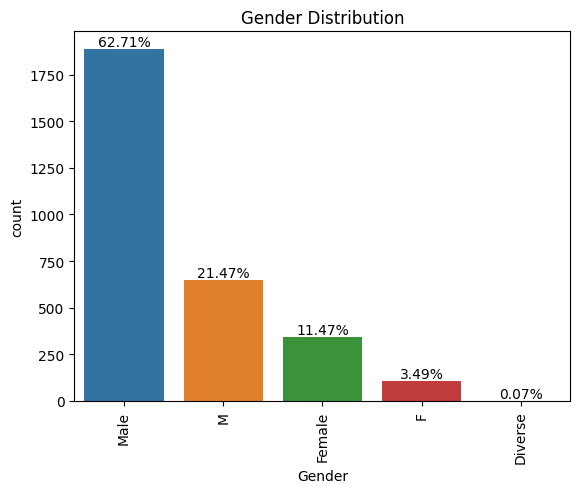

In [38]:
plt_univariate_histogram(df_merged, GENDER, show_percentage=True)

## Gender distribution after Cleaning

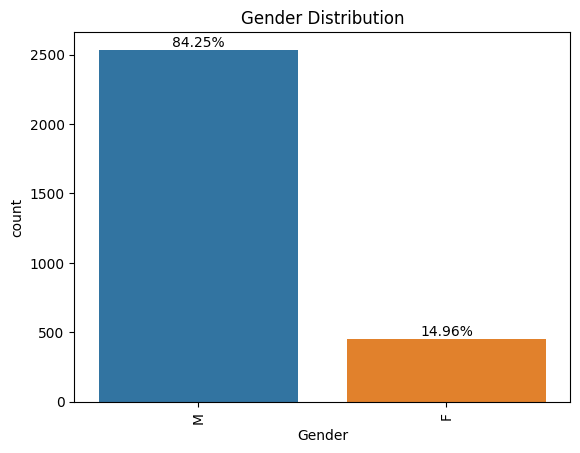

In [39]:
df_merged = clean_gender(df_merged)
plt_univariate_histogram(df_merged, GENDER, show_percentage=True)

## Distribution of Salary for each gender

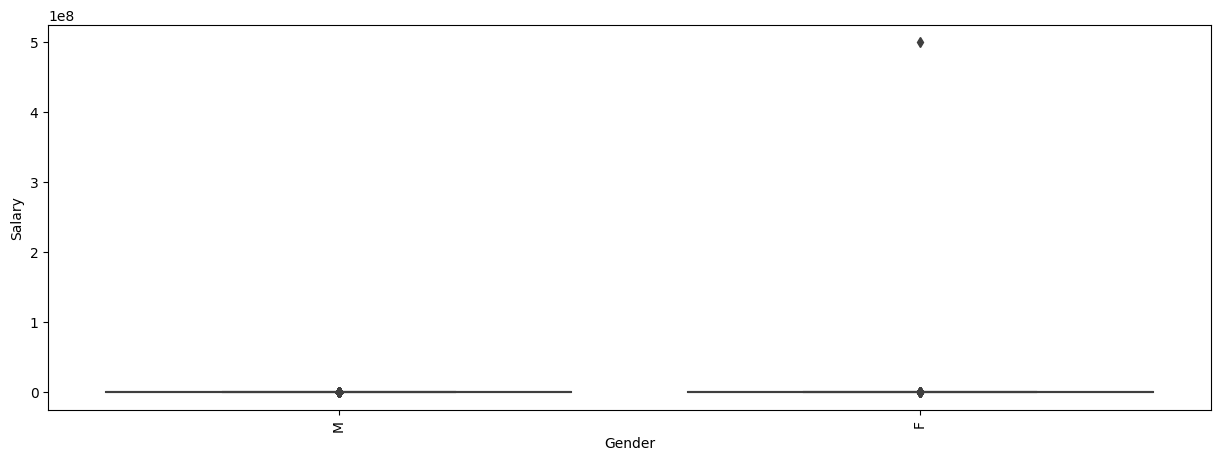

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(x=GENDER, y=SALARY, data=df_merged)
plt.xticks(rotation=90)
plt.show()

## Distribution of Salary for each gender
### After Outliers removal

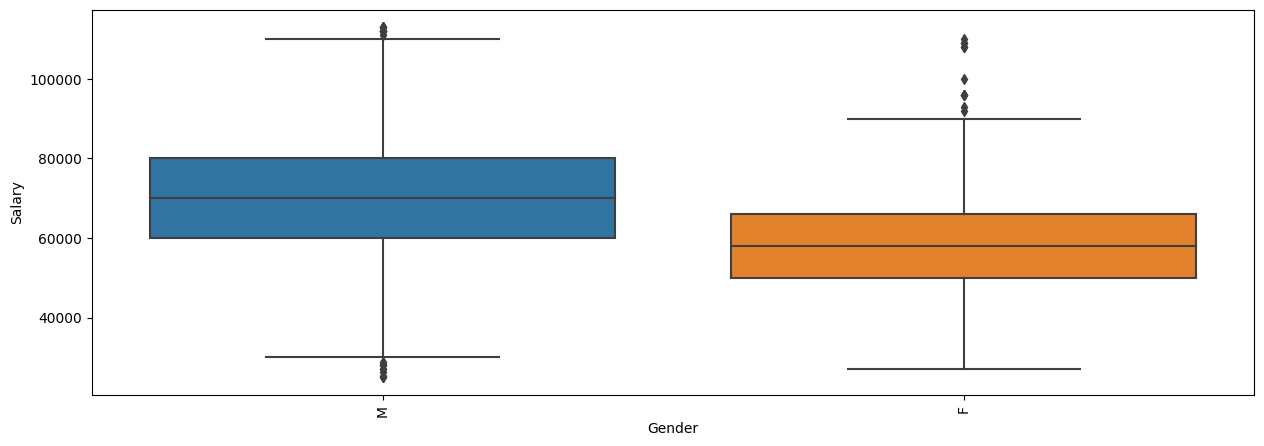

In [41]:
df_merged = remove_outliers(df_merged,SALARY)
plt.figure(figsize=(15,5))
sns.boxplot(x=GENDER, y=SALARY, data=df_merged)
plt.xticks(rotation=90)
plt.show()

### Imputing the 24 missing gender with mode 'M'

In [46]:
df_merged[GENDER].fillna(df_merged[GENDER].mode()[0], inplace=True)
df_missing_values = df_merged.isna().sum().to_frame(name='Missing Values').T
df_missing_values

,Salary,Company size,Age,Gender,City,Position,Years of experience,Seniority level
Missing Values,0,30,190,0,13,16,33,32
